imports and parameters

In [5]:
# !pip uninstall keras
# !pip uninstall tensorflow
# !pip install Keras==2.2.4
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 108kB/s 
     |████████████████████████████████| 491kB 51.3MB/s 
     |████████████████████████████████| 3.2MB 56.9MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten ,Input
from keras.layers import Conv2D, MaxPooling2D, Reshape, Add
from keras.metrics import categorical_accuracy
from keras.regularizers import l1_l2, l2, l1
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from tensorflow.python.keras import backend as K
from keras.preprocessing.image import array_to_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
from keras.initializers import RandomNormal
from keras.layers import Dense, Conv2D, Flatten, Reshape, Dropout, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model



img_cols, img_rows, channels = 28, 28 ,1
optimizer = Adam(0.0002, 0.5)
noise_dim = 100
batch_size = 16
epochs = 10
steps_per_epoch = 3750
use_gan = True
use_fashion = True

auxilary functions

In [0]:
import matplotlib.pyplot as plt

def show_images(noise):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def accuracy(y_true, y_pred):
  acc = 0
  for i in range(len(x_test)):
    if np.argmax(y_pred[i]) == np.argmax(y_true[i]):
      acc += 1
  return acc/len(x_test)

create classifier and discriminator, based on the cllassifier

In [0]:
# define the standalone discriminator model
def create_base_model(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape,name='first_conv_class'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	return model

def create_classifier(model):
  classifier_input = Input(shape=(28,28,1))
  x = model(classifier_input)
  classifier_output = Dense(10, activation='softmax', input_shape=(img_cols, img_rows, channels),name='last_classifier')(x)
  classifier = Model(classifier_input, classifier_output)
  classifier.compile(loss='binary_crossentropy', optimizer=optimizer)
  return classifier


def create_discriminator(model):
  discriminator_input = Input(shape=(28,28,1))
  x = model(discriminator_input)
  discriminator_output = Dense(1, activation='sigmoid', input_shape=(img_cols, img_rows, channels),name='last_discriminator')(x)
  discriminator = Model(discriminator_input, discriminator_output)
  discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
  return discriminator


# define the standalone generator model
def define_generator():
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 128 * 7 * 7
  model.add(Dense(n_nodes, input_dim=noise_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7, 7, 128)))
  # upsample to 14x14
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 28x28
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
  return model


load MNIST and define models

4423680/4422102 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 0 	 Discriminator Loss: 0.6501184701919556 		 Generator Loss: 0.8419480323791504 		 classifier val acc: 0.8354


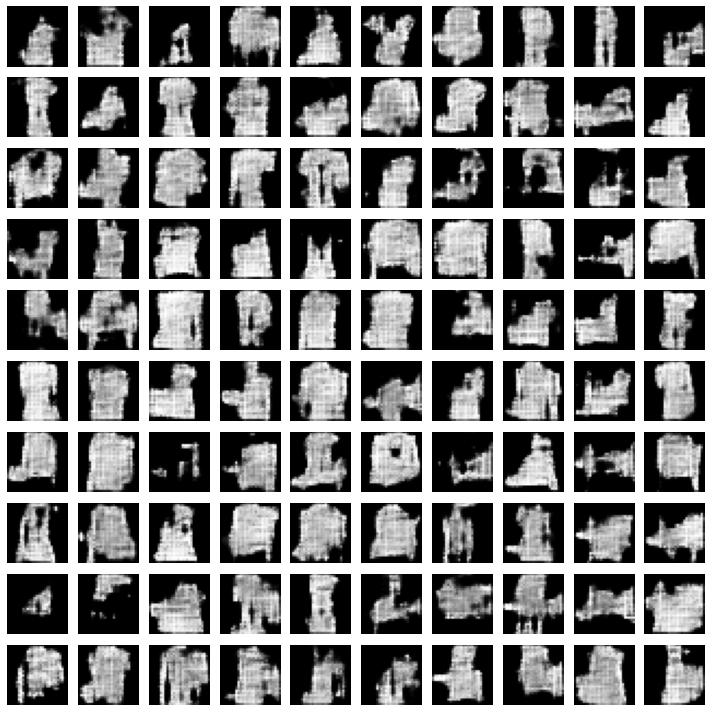

Epoch: 1 	 Discriminator Loss: 0.6771228313446045 		 Generator Loss: 0.8498460054397583 		 classifier val acc: 0.8561


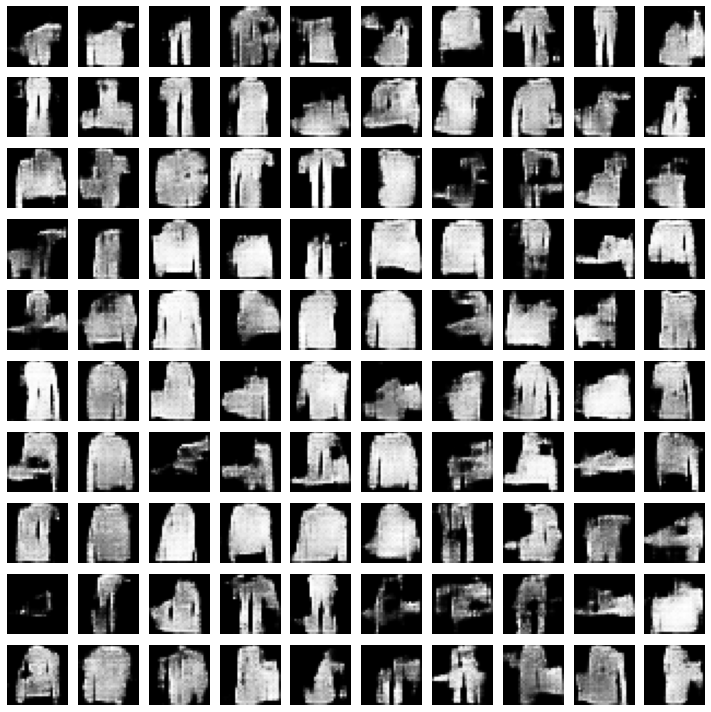

Epoch: 2 	 Discriminator Loss: 0.6663550138473511 		 Generator Loss: 0.835621178150177 		 classifier val acc: 0.8641


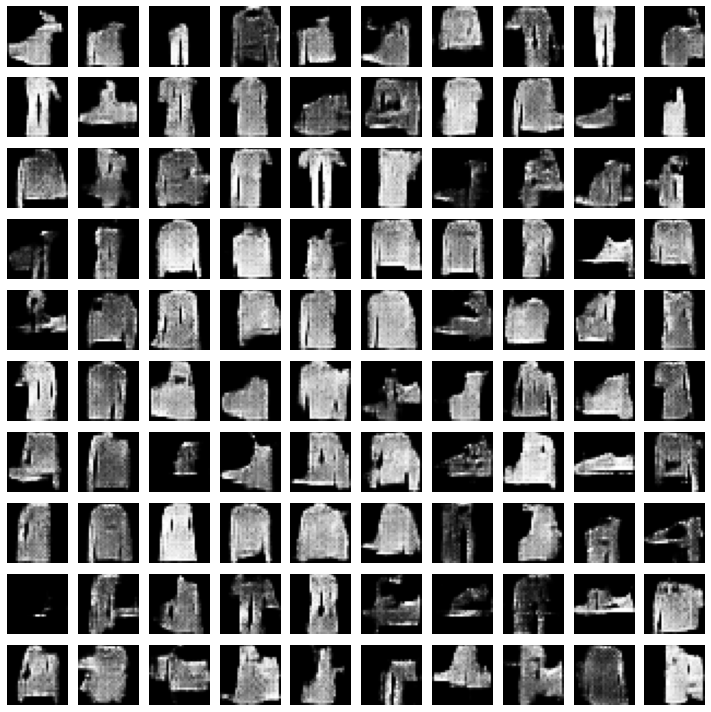

Epoch: 3 	 Discriminator Loss: 0.7088477611541748 		 Generator Loss: 0.8811546564102173 		 classifier val acc: 0.8708


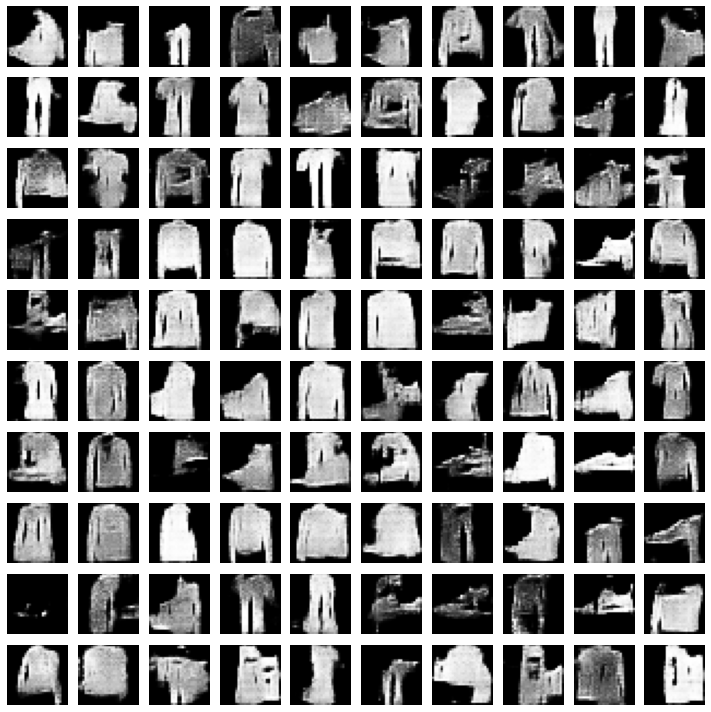

Epoch: 4 	 Discriminator Loss: 0.6883284449577332 		 Generator Loss: 0.803694486618042 		 classifier val acc: 0.8782


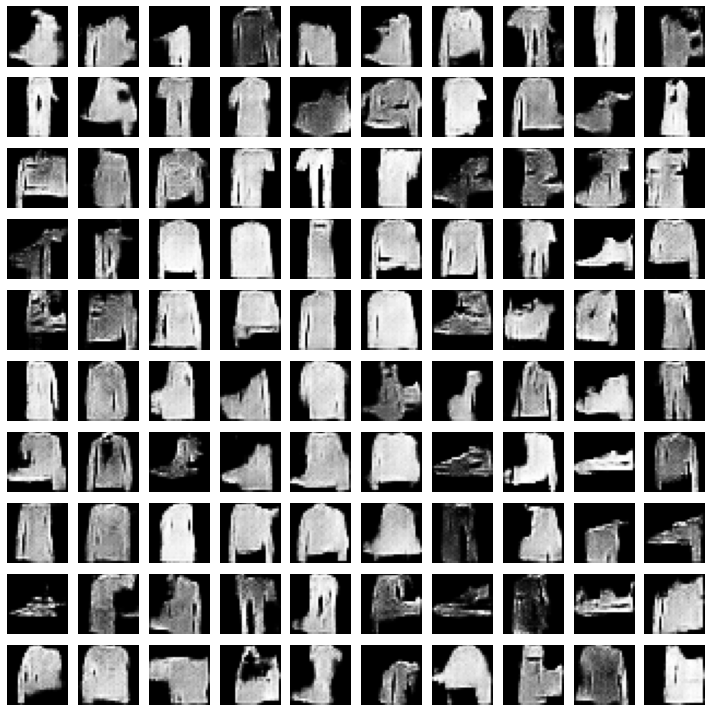

Epoch: 5 	 Discriminator Loss: 0.6934008598327637 		 Generator Loss: 0.7830502986907959 		 classifier val acc: 0.8808


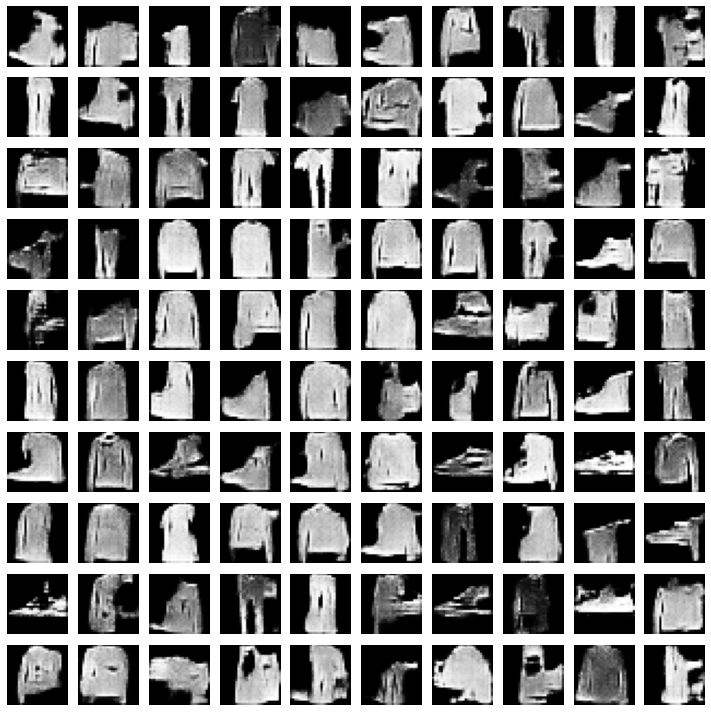

Epoch: 6 	 Discriminator Loss: 0.6918976902961731 		 Generator Loss: 0.8974867463111877 		 classifier val acc: 0.8836


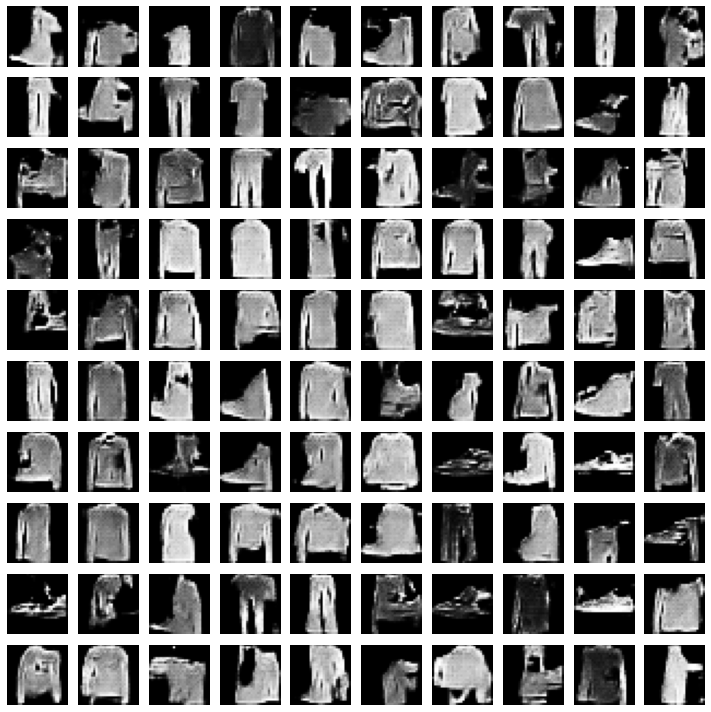

Epoch: 7 	 Discriminator Loss: 0.6701828241348267 		 Generator Loss: 0.8082913160324097 		 classifier val acc: 0.8856


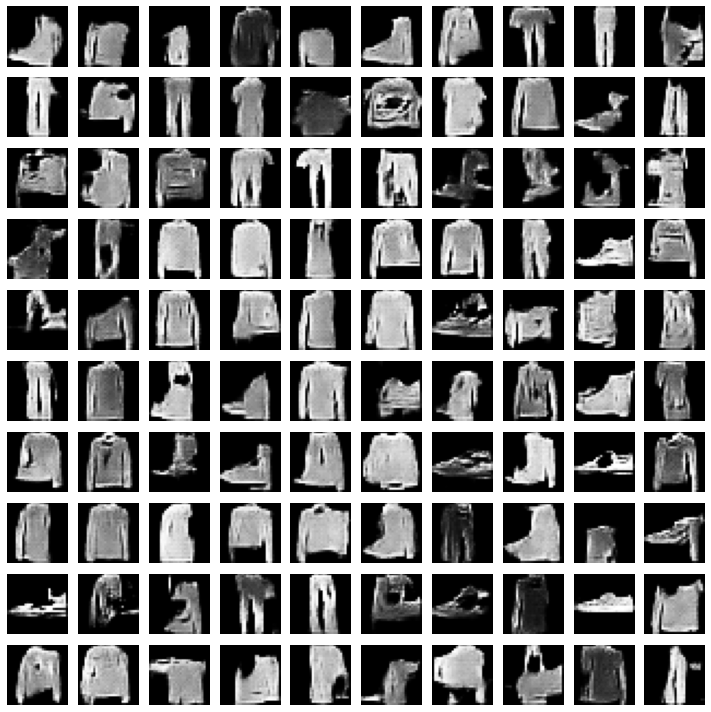

Epoch: 8 	 Discriminator Loss: 0.6590039134025574 		 Generator Loss: 0.858123779296875 		 classifier val acc: 0.891


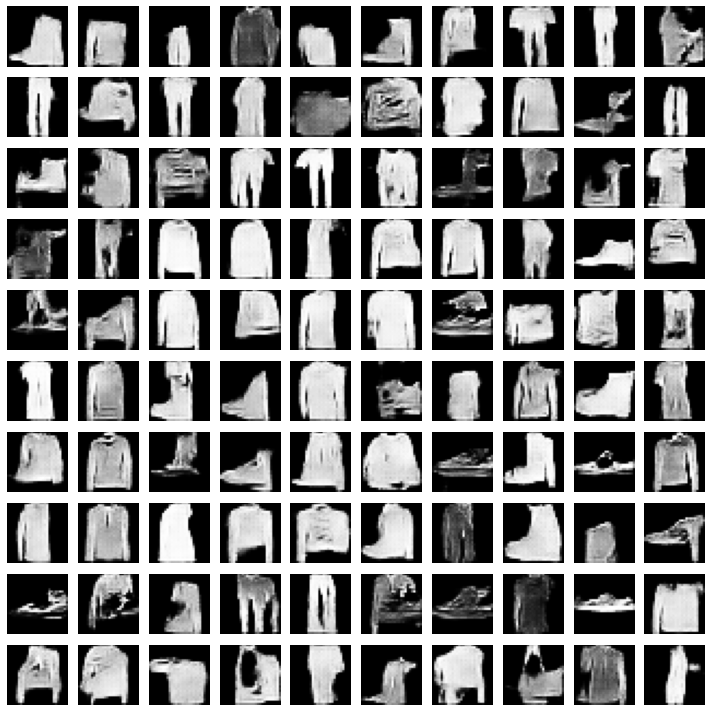

Epoch: 9 	 Discriminator Loss: 0.69083571434021 		 Generator Loss: 0.777615487575531 		 classifier val acc: 0.8879


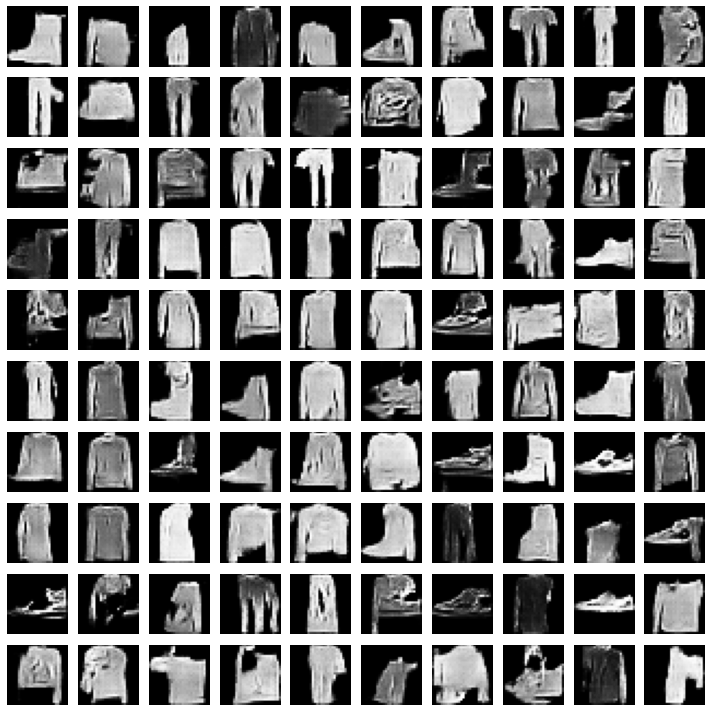

In [45]:
#load MNIST dataset
if use_fashion:
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
else:
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

#preprocess data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# #compile CNN network for MNIST classification 
base_model = create_base_model()
mnist_model = create_classifier(base_model)
plot_model(mnist_model, to_file='mnist_model.png')

mnist_disc = create_discriminator(base_model)
# plot_model(mnist_disc, to_file='mnist_disc.png')

mnist_disc.trainable = False
generator = define_generator()
gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)
gan_output = mnist_disc(fake_image)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)
plot_model(gan, to_file='gan.png')

# train

class_loss = 0
static_noise = np.random.normal(0, 1, size=(100, noise_dim))
for epoch in range(10):
    for batch in range(steps_per_epoch):
      if use_gan:
        # GAN training
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        fake_x = generator.predict(noise)
        x = np.concatenate((real_x, fake_x))
        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9
        d_loss = mnist_disc.train_on_batch(x, disc_y)
        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)
        
      # classifier training
      idx = np.random.randint(0, x_train.shape[0], size=batch_size)
      real_x = x_train[idx]
      real_y = y_train[idx]
      class_loss = mnist_model.train_on_batch(real_x, real_y)
    if use_gan:
      y_pred = mnist_model.predict(x_test)
      acc = accuracy(y_test, y_pred)
      print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss} \t\t classifier val acc: {acc}')
      show_images(static_noise)
    else:
      y_pred = mnist_model.predict(x_test)
      acc = accuracy(y_test, y_pred)
      print(f'Epoch: {epoch} \t classifier val acc: {acc}')

# #train MNIST classifer
# earlyStop = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=10, verbose=0, mode='auto',baseline=None, restore_best_weights=True)

# mnist_model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=0, validation_data=(x_test, y_test),callbacks=[earlyStop])

# print(mnist_model.evaluate(x_train, y_train))
# print(mnist_model.evaluate(x_test, y_test))

image selection

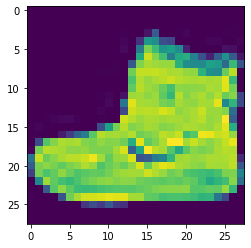

prediction =  9


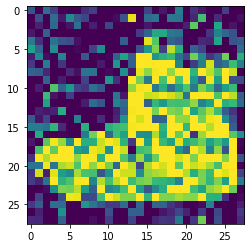

noisy_prediction =  9


In [46]:
#select image to create an adversarial example from
img = x_train[0:1]
plt.imshow(img.reshape((28,28)),vmin=0., vmax=1.)
plt.show()
#varify accurate classificaiton
prediction = mnist_model.predict(img)[0]
print("prediction = ",np.argmax(prediction))

#applying random noise does not fool the classifier
quantized_noise = np.round(np.random.normal(loc=0.0, scale=0.3, size=img.shape) * 255.) / 255.
noisy_img = np.clip(img + quantized_noise, 0., 1.)
plt.imshow(noisy_img.reshape((28,28)),vmin=0., vmax=1.)
plt.show()
noisy_prediction = mnist_model.predict(noisy_img)[0]
print("noisy_prediction = ",np.argmax(noisy_prediction))

generate adverserial examples

predicted as =  0
predicted as =  0
predicted as =  0
predicted as =  1
predicted as =  1
predicted as =  1
predicted as =  2
predicted as =  2
predicted as =  2
predicted as =  3
predicted as =  3
predicted as =  3
predicted as =  4
predicted as =  4
predicted as =  4
predicted as =  6
predicted as =  6
predicted as =  6
predicted as =  7
predicted as =  7
predicted as =  7
predicted as =  8
predicted as =  8
predicted as =  8
predicted as =  9
predicted as =  9
predicted as =  9


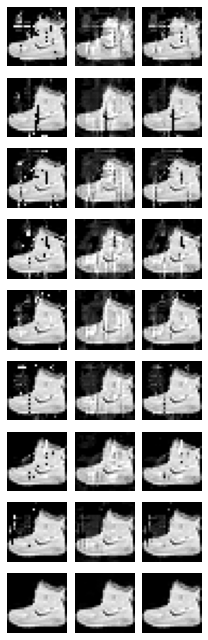

In [47]:

#custom activation function for keeping adversarial pixel values between 0.0 and 1.0
def clip(x):
    return K.clip(x, 0.0, 1.0)

#custom loss funciton for non-targeted misclassification
def negative_categorical_crossentropy(yTrue,yPred):
    return 0.0 - K.categorical_crossentropy(yTrue,yPred)

#add custom objects to dictionary
get_custom_objects().update({'clip': Activation(clip)})
get_custom_objects().update({'negative_categorical_crossentropy': negative_categorical_crossentropy})


#function for generating an adversarial example given a base image, adversarial class target, classifier, and regularization type
def generate_adversary(img,target,model,regularization,loss_function):
    
    #input for base image
    image = Input(shape=(28,28,1),name='image')
    #unit input for adversarial noise
    one = Input(shape=(1,),name='unity')
    
    #layer for learning adversarial noise to apply to image
    noise = Dense(28*28,activation = None,use_bias=False,kernel_initializer='random_normal',kernel_regularizer=regularization, name='adversarial_noise')(one)
    
    #reshape noise in shape of image
    noise = Reshape((28,28,1),name='reshape')(noise)
    
    #add noise to image
    net = Add(name='add')([noise,image])
    #clip values to be within 0.0 and 1.0
    net = Activation('clip',name='clip_values')(net)
    
    #feed adversarial image to trained MNIST classifier
    outputs = model(net)

    adversarial_model = Model(inputs=[image,one], outputs=outputs)
    #freeze trained MNIST classifier layers
    adversarial_model.layers[-1].trainable = False
    
    adversarial_model.compile(optimizer='nadam', loss=loss_function, metrics=[categorical_accuracy])
    #target adversarial classification
    target_vector = np.zeros(10)
    target_vector[target] = 1.
    
    #callback for saving weights with smallest loss
    checkpoint = ModelCheckpoint('./adversarial_weights.h5', monitor='loss', verbose=0, save_best_only=True, save_weights_only=True,mode='auto', period=1)
    #train adversarial image
    X = [img,np.ones(shape=(1,1))]
    adversarial_model.fit(x=X,y=target_vector.reshape(1,-1),epochs=10000,verbose=0,callbacks=[checkpoint])
    #restore best weights
    adversarial_model.load_weights('./adversarial_weights.h5')
    
    #quantize adversarial noise
    quantized_weights = np.round(adversarial_model.get_weights()[0].reshape((28,28)) * 255.) / 255.
    
    #add trained weights to original image and clip values to produce adversarial image
    adversarial_img = np.clip(img.reshape((28,28)) + quantized_weights, 0., 1.)
    
    # #display adversarial image
    # plt.imshow(adversarial_img,vmin=0., vmax=1.,cmap="gray")
    # plt.show()
    #classify adversarial image
    adversarial_prediction = mnist_model.predict(adversarial_img.reshape((1,28,28,1)))
    print("predicted as = ", np.argmax(adversarial_prediction))
    
    return adversarial_img

adversary_set = []
for num in range(10):
  if num != prediction:
    adversary_set.append(generate_adversary(img,num,mnist_model,l1(0.01),'categorical_crossentropy'))
    adversary_set.append(generate_adversary(img,num,mnist_model,l2(0.01),'categorical_crossentropy'))
    adversary_set.append(generate_adversary(img,num,mnist_model,l1_l2(l1=0.01,l2=0.01),'categorical_crossentropy'))


plt.figure(figsize=(3, 9))
for i, image in enumerate(adversary_set):
    plt.subplot(9, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


TODO compare with sparse model + gan model